### Step #1: Understand the Problem Statement

The objective of this case study is to **predict the employee salary based on the number of years of experience**.

In **simple linear regression**, we predict the value of one variable \( Y \) based on another variable \( X \).

- \( X \) is called the **independent variable**.
- \( Y \) is called the **dependent variable**.

**Why simple?** Because it examines the relationship between two variables only.

**Why linear?** When the independent variable increases (or decreases), the dependent variable increases (or decreases) in a linear fashion.


### Step #2: Import Libraries and Datasets

In [4]:
# Importing necessary libraries

# TensorFlow for building and training machine learning models
import tensorflow as tf

# pandas for data manipulation and analysis
import pandas as pd

# numpy for numerical operations
import numpy as np

# seaborn for statistical data visualization
import seaborn as sns

# matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Ensure that seaborn and matplotlib are correctly imported
# seaborn is misspelled as 'seabor' in the original code


In [7]:
# Importing the kagglehub library to interact with Kaggle datasets
import kagglehub

# Downloading the latest version of the specified dataset from Kaggle
# The dataset is identified by its unique identifier "rohankayan/years-of-experience-and-salary-dataset"
path = kagglehub.dataset_download("rohankayan/years-of-experience-and-salary-dataset")

# Printing the local path where the dataset files are saved
print("Path to dataset files:", path)


Path to dataset files: C:\Users\men_l\.cache\kagglehub\datasets\rohankayan\years-of-experience-and-salary-dataset\versions\1


In [12]:
# Reading the CSV file 'Salary_Data.csv' into a pandas DataFrame
# This DataFrame will contain the dataset with employee salary and years of experience
salary_df = pd.read_csv('Salary_Data.csv')

# Displaying the first few rows of the DataFrame to verify the data has been loaded correctly
salary_df


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Further Steps:

1. **Use `head` and `tail` methods to print the first and last 7 rows of the DataFrame:**

2. **Try to find the maximum salary value in the DataFrame:**

In [13]:
# Display the first 7 rows of the DataFrame
salary_df.head(7)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0


In [14]:
# Display the last 7 rows of the DataFrame
salary_df.tail(7)

,YearsExperience,Salary
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [16]:
# Find the maximum salary value in the DataFrame
max_salary = salary_df['Salary'].max()
print("Maximum Salary:", max_salary)


Maximum Salary: 122391.0


### Step #3: Perform Exploratory Data Analysis and Visualization

<Axes: >

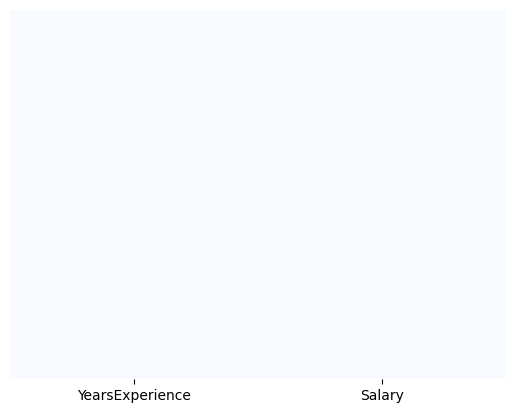

In [19]:
# Check if there are any null values in the DataFrame
# The isnull() method returns a DataFrame of the same shape as salary_df, 
# with True indicating missing values and False indicating non-missing values.
# sns.heatmap() is used to create a heatmap visualization of the null values.
# yticklabels=False removes the y-axis labels for a cleaner look.
# cbar=False removes the color bar to focus on the presence of null values.
# cmap="Blues" sets the color map to shades of blue for better visual distinction.

sns.heatmap(salary_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")


In [21]:
# Check the DataFrame info
# The info() method provides a concise summary of the DataFrame.
# It includes the number of non-null entries, column names, data types, and memory usage.
# This is useful for getting an overview of the dataset and identifying any potential issues, such as missing values or incorrect data types.

salary_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [23]:
# Generate a statistical summary of the DataFrame
# The describe() method provides descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution.
# It includes metrics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum.
# This summary is useful for understanding the overall distribution and spread of the data.

salary_df.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Further Steps:

1. **What are the number of years of experience corresponding to employees with minimum and maximum salaries?**

In [26]:
# Find the number of years of experience for the employee with the minimum salary
min_salary_experience = salary_df.loc[salary_df['Salary'].idxmin(), 'YearsExperience']
print("Years of Experience for Minimum Salary:", min_salary_experience)

# Find the number of years of experience for the employee with the maximum salary
max_salary_experience = salary_df.loc[salary_df['Salary'].idxmax(), 'YearsExperience']
print("Years of Experience for Maximum Salary:", max_salary_experience)


Years of Experience for Minimum Salary: 1.5
Years of Experience for Maximum Salary: 10.3


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

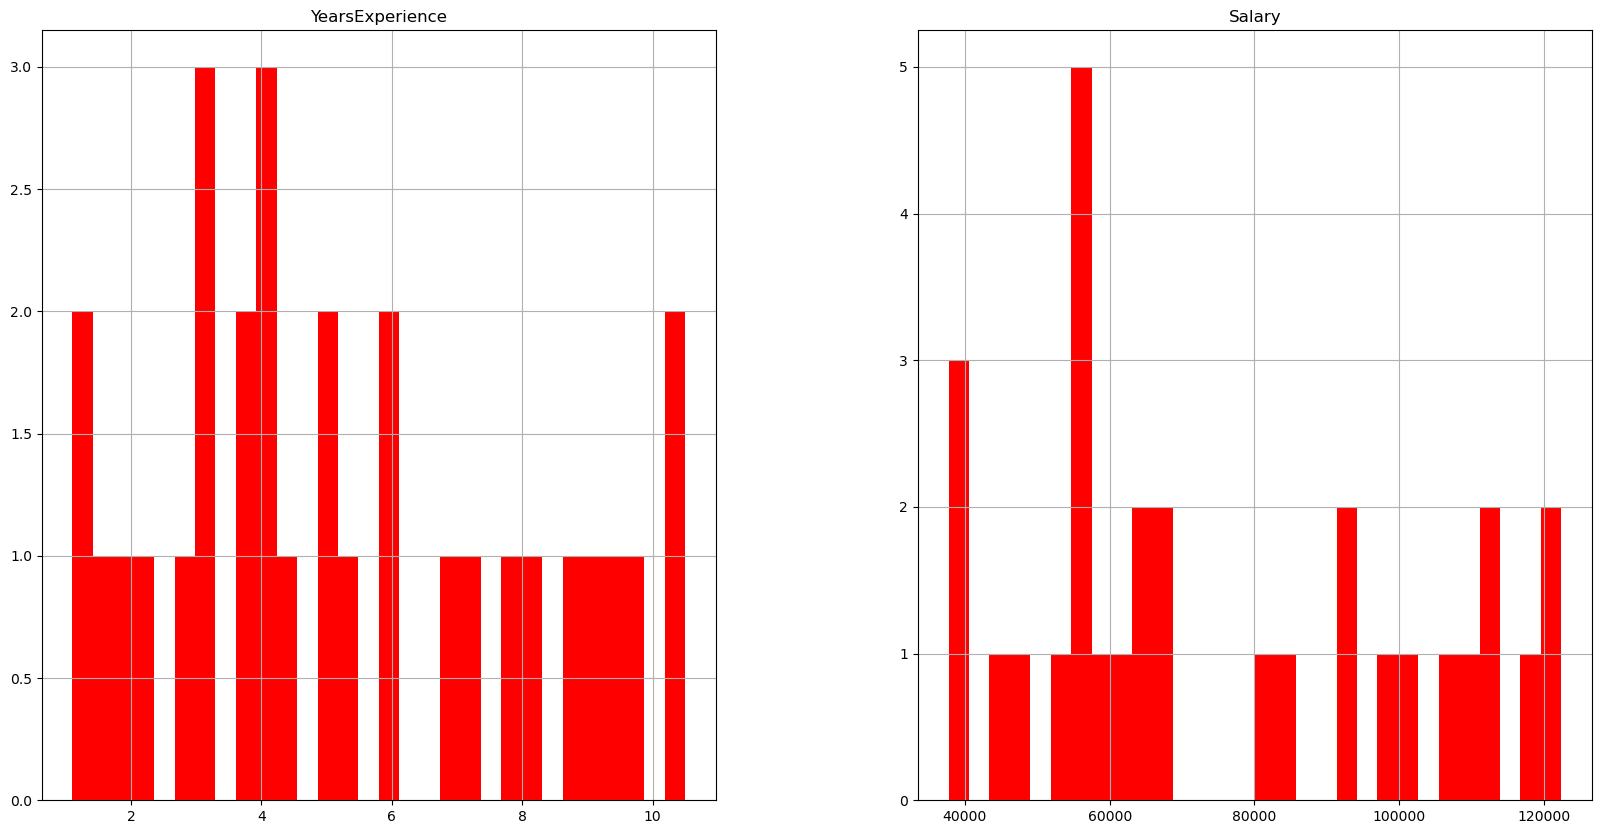

In [29]:
# Create histograms for each numerical column in the DataFrame
# The hist() method generates a histogram for each numerical column in the DataFrame.
# bins=30 specifies the number of bins to use for the histogram, providing a more granular view of the data distribution.
# figsize=(20, 10) sets the size of the figure to 20 inches by 10 inches, making the plot larger and easier to read.
# color='r' sets the color of the histograms to red for better visual distinction.

salary_df.hist(bins=30, figsize=(20, 10), color='r')


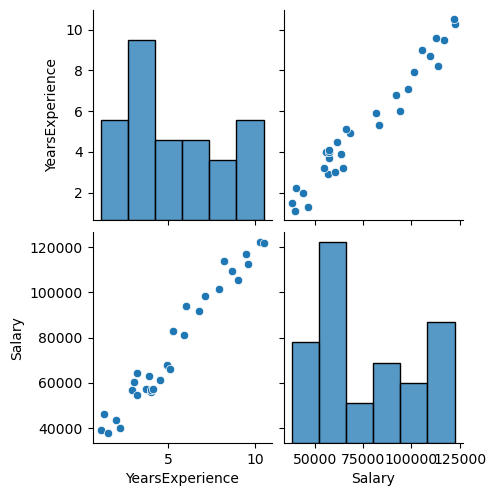

In [31]:
# Plot pairwise relationships in the DataFrame using seaborn's pairplot
# The pairplot() function creates a grid of Axes such that each numeric variable in the DataFrame
# will be shared across the y-axes across a single row and the x-axes across a single column.
# This allows for visualization of the relationships between pairs of variables in the dataset.
# By default, pairplot() will create scatter plots for each pair of variables and histograms for the marginal plots along the diagonal.

sns.pairplot(salary_df)


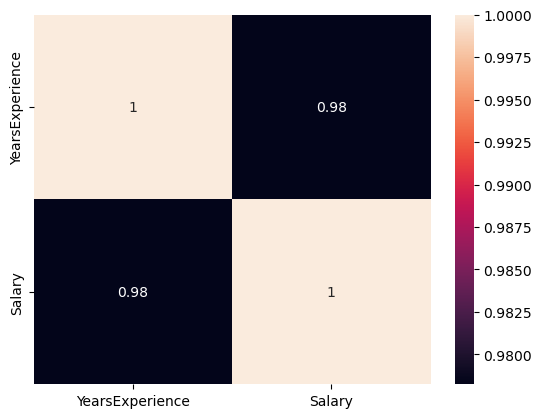

In [33]:
# Calculate the correlation matrix for the DataFrame
# The corr() method computes pairwise correlation of columns, excluding NA/null values.
# The resulting correlation matrix shows the correlation coefficients between each pair of columns in the DataFrame.
corr_matrix = salary_df.corr()

# Create a heatmap to visualize the correlation matrix using seaborn
# sns.heatmap() is used to plot the correlation matrix as a heatmap.
# annot=True adds the correlation coefficient values as annotations on the heatmap cells.
sns.heatmap(corr_matrix, annot=True)

# Display the heatmap
# plt.show() is used to display the plot.
plt.show()


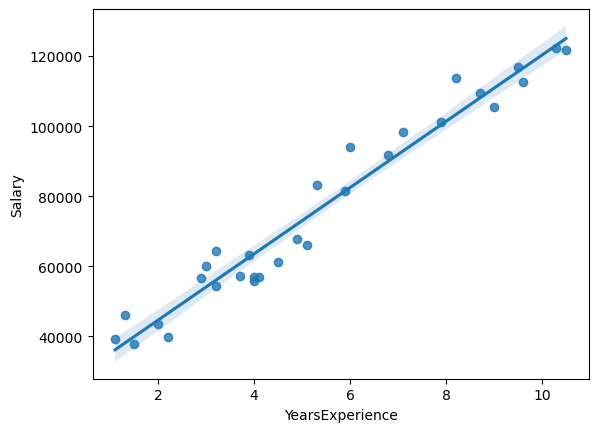

In [36]:
# Plotting a regression line to show the relationship between 'Salary' and 'YearsExperience'
# sns.regplot() creates a scatter plot with a linear regression model fit.
# x='YearsExperience' specifies the independent variable.
# y='Salary' specifies the dependent variable.
# data=salary_df specifies the DataFrame containing the data.
# The function will automatically fit a linear regression model and plot the regression line.

sns.regplot(x='YearsExperience', y='Salary', data=salary_df)

# Display the plot
plt.show()


### Step 4: Create Training and Testing Dataset

In [38]:
# Selecting the feature (independent variable) for the model
# X is a DataFrame containing the 'YearsExperience' column from salary_df.
# This represents the number of years of experience of the employees.
X = salary_df[['YearsExperience']]

# Selecting the target (dependent variable) for the model
# y is a DataFrame containing the 'Salary' column from salary_df.
# This represents the salary of the employees.
y = salary_df[['Salary']]


In [40]:
# Display the first few rows of the feature variable X
X.head()


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [42]:
# Display the first few rows of the target variable y
y.head()


,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


In [47]:
# Display the shape of the feature variable X
X.shape


(30, 1)

In [48]:
# Display the shape of the target variable y
y.shape


(30, 1)

In [50]:
import numpy as np

# Convert the input data X to a NumPy array of type float32
X = np.array(X, dtype='float32')

# Convert the target data y to a NumPy array of type float32
y = np.array(y, dtype='float32')


To scale only the numerical variables in dataset `X`, we can use the `StandardScaler` from the `sklearn.preprocessing` module. This will standardize the features by removing the mean and scaling to unit variance.


In [60]:
# Select only the numerical variables from the dataset and apply scaling to them
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]], dtype=float32)

In [61]:

# Select only the numerical variables from the DataFrame
numerical_df = salary_df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical variables
scaled_numerical = scaler.fit_transform(numerical_df)

# Convert the scaled data back to a DataFrame
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_df.columns)

# Display the first few rows of the scaled DataFrame
print(scaled_numerical_df.head())


   YearsExperience    Salary
0        -1.510053 -1.360113
1        -1.438373 -1.105527
2        -1.366693 -1.419919
3        -1.187494 -1.204957
4        -1.115814 -1.339781


In [62]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: Features (input variables)
# y: Target variable (output variable)
# test_size=0.2: 20% of the data will be used for testing, and 80% for training
# The function returns four arrays: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train: Training set features
# X_test: Testing set features
# y_train: Training set target variable
# y_test: Testing set target variable


## Further Steps

1. **Split the Data**:
   - Split the data into 75% for training and 25% for testing.

2. **Verify the Split**:
   - Verify that the split was successful by obtaining the shape of both `X_train` and `X_test`.

3. **Check Data Order**:
   - Did you notice any change in the order of the data? Explain why this might have happened.

In [64]:
# Import the train_test_split function from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with 75% for training and 25% for testing
# random_state=42 ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verify the split by checking the shape of the resulting arrays
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (22, 1)
Shape of X_test: (8, 1)
Shape of y_train: (22, 1)
Shape of y_test: (8, 1)


## Step 5: Train a Linear Regression Model in Scikit-Learn

**Note**: SageMaker built-in algorithms are not used here.


In [67]:
# Import necessary libraries from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the Linear Regression model
# fit_intercept=True means that the model will calculate the intercept (bias term)
regression_model_sklearn = LinearRegression(fit_intercept=True)

# Fit the model to the training data
# X_train: Training data features
# y_train: Training data target variable
regression_model_sklearn.fit(X_train, y_train)

# Predict the target variable for the test data
# X_test: Test data features
y_pred = regression_model_sklearn.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
# y_test: Actual target values for the test data
# y_pred: Predicted target values for the test data
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 38802592.00
